![example](images/director_shot.jpeg)

# Movies for Microsoft

**Author:** Alexandria Yoo
***

## Overview

.....(A one-paragraph overview of the project, including the business problem, data, methods, results and .....recommendations.)

This project analyses the trends accommodating the best performing movies in the recent box office. This project aims to uncover the attributes held common to the better performing movies and therefore provide business recommendations to Microsoft as a company new to the movie industry with an interest in creating a new movies studio. Ultimately, Microsoft will be able to use the results yielded by this project to optimize their chances of producing high-performing movies.   
 ......(The Austin Animal Center can use this analysis to adjust outreach, hiring, and space utilization to improve resource allocation.)

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

Accessible Data File:
    1. bom.movie_gross.csv (title, studio, domestic_gross, foreign_gross, year)
    2. rt.movie_info.tsv (id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio)
    3. rt.reviews.tsv (id, review, rating, fresh, critic, top_critic, publisher, date)
    4. tmbd.movies.csv (genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count)    

In [302]:
# Import standard packages
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Exploration

1. bom.movie_gross.csv (title, studio, domestic_gross, foreign_gross, year)

In [18]:
bmg = pd.read_csv("/Users/alexandriayoo/Downloads/dsc-project-template-template-mvp/zippedData/bom.movie_gross.csv")
bmg.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


+ no. unique 'title's/movies

In [153]:
uq_title = set(bmg["title"])
len(uq_title)

3386

+ no. & list of unique 'studio'

In [154]:
uq_studio = set(bmg["studio"])
len(uq_studio)

258

+ top 5 highest 'domestic_gross' (order desc) and corresponding 'title'/movie

In [167]:
dg_title = bmg[["title","domestic_gross"]]
dg_title.sort_values(by = ["domestic_gross"], ascending = False).head()

,title,domestic_gross
1872,Star Wars: The Force Awakens,936700000.0
3080,Black Panther,700100000.0
3079,Avengers: Infinity War,678800000.0
1873,Jurassic World,652300000.0
727,Marvel's The Avengers,623400000.0


+ top 5 highest 'foreign_gross' (order desc) and corresponding 'title'/movie

In [618]:
title_fg = noNan[["title","foreign_gross"]]
title_fg.sort_values(by = ["foreign_gross"], ascending = False).head()

,title,foreign_gross
328,Harry Potter and the Deathly Hallows Part 2,960500000
1875,Avengers: Age of Ultron,946400000
727,Marvel's The Avengers,895500000
3081,Jurassic World: Fallen Kingdom,891800000
1127,Frozen,875700000


+ top5 5 highest 'total_gross' and corresponding 'title'/movie

In [1274]:
noNan["total_gross"] = noNan["foreign_gross"] + noNan["domestic_gross"]
tg = noNan[["title","total_gross"]]
tg.sort_values(by=["total_gross"],ascending=False).head()

,title,total_gross
727,Marvel's The Avengers,1.518900e+09
1875,Avengers: Age of Ultron,1.405400e+09
3080,Black Panther,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,1.341500e+09
2758,Star Wars: The Last Jedi,1.332600e+09


+ average 'domestic_gross' by 'studio', order in desc.

In [196]:
dg_stu = bmg[["studio","domestic_gross"]]
dg_stu_grouped = dg_stu.groupby("studio")
dg_stu_grouped.mean().sort_values(by = ["domestic_gross"], ascending = False).head()

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07


In [1037]:
store_dg_stu = dg_stu_grouped.mean().sort_values(by = ["domestic_gross"], ascending = False)

+ average 'foreign_gross' by 'studio', order in desc.

In [ ]:
# average foreign_gross (code in NaN section below): 
# avg_fg = 74872810.14973

In [616]:
# average "foreign_gross" by 'studio': 
stu_fg = noNan[["studio","foreign_gross"]]
stu_fg_grouped = stu_fg.groupby("studio")
stu_fg_avg = stu_fg_grouped.mean()
stu_fg_avg.sort_values(by = "foreign_gross", ascending = False).head()

,foreign_gross
studio,
HC,8.676000e+08
P/DW,3.393600e+08
BV,2.436911e+08
GrtIndia,2.340000e+08
Fox,1.477446e+08


In [1119]:
store_fg_stu = stu_fg_avg.sort_values(by = ["foreign_gross"], ascending = False)

+ average 'total_gross' by 'studio', order in desc.

In [1280]:
stu_tg = noNan[["studio","total_gross"]]
stu_tg_grouped = stu_tg.groupby("studio")
avg_stu_tg = stu_tg_grouped.mean()
avg_stu_tg = avg_stu_tg.sort_values(by=["total_gross"],ascending=False)
avg_stu_tg.head()

,total_gross
studio,
HC,8.703000e+08
P/DW,5.076500e+08
BV,4.174555e+08
GrtIndia,2.542000e+08
WB (NL),2.300756e+08


+ no. of "title"/movies per studio

In [216]:
title_stu = bmg[["title","studio"]]
title_stu_grouped = title_stu.groupby("studio")
title_stu_grouped.count().head()

,title
studio,
3D,1
A23,2
A24,49
ADC,2
AF,6


+ plot 'year' vs. 'domestic_gross'

+ plot 'year' vs. 'foreign_gross'

+ inspect if there is relationship between 'domestic_gross' & 'foreign_gross' 
   -> if so, plot 'domestic_gross' vs 'foreign_gross' 

2. rt.movie_info.tsv (id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio)

In [239]:
rm = pd.read_table("/Users/alexandriayoo/Downloads/dsc-project-template-template-mvp/zippedData/rt.movie_info.tsv")
rm.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


+ unique 'rating'

In [222]:
rm["rating"].unique()     # remove Nan

array(['R', 'NR', 'PG', 'PG-13', nan, 'G', 'NC17'], dtype=object)

+ no. of 'rating'

In [230]:
len(rm["rating"].unique()) # remove Nan

7

+ unique 'genre'

In [223]:
rm["genre"].unique()

array(['Action and Adventure|Classics|Drama',
       'Drama|Science Fiction and Fantasy',
       'Drama|Musical and Performing Arts', 'Drama|Mystery and Suspense',
       'Drama|Romance', 'Drama|Kids and Family', 'Comedy', 'Drama',
       'Action and Adventure|Mystery and Suspense|Science Fiction and Fantasy',
       nan, 'Documentary', 'Documentary|Special Interest',
       'Classics|Comedy|Drama', 'Comedy|Drama|Mystery and Suspense',
       'Action and Adventure|Comedy|Drama',
       'Action and Adventure|Drama|Science Fiction and Fantasy',
       'Art House and International|Comedy|Drama|Musical and Performing Arts',
       'Musical and Performing Arts',
       'Classics|Comedy|Musical and Performing Arts|Romance',
       'Action and Adventure|Drama|Mystery and Suspense',
       'Action and Adventure|Mystery and Suspense',
       'Art House and International|Classics|Horror|Mystery and Suspense',
       'Horror',
       'Action and Adventure|Classics|Drama|Mystery and Suspense',
   

+ no. of 'genre'

In [1283]:
len(rm["genre"].unique())

300

+ unique 'currency'

In [622]:
rm.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [625]:
rm["currency"].value_counts()

$    340
Name: currency, dtype: int64

In [633]:
1220/(1220+340)
# 78% of data entries for "currency" is Nan, with remaining 22% being of "$" currency

0.782051282051282

In [632]:
rm["currency"].unique()

array([nan, '$'], dtype=object)

In [ ]:
# "$" and Nan are the unique entries of "currency"

+ unique 'director'

In [225]:
rm["director"].unique()

array(['William Friedkin', 'David Cronenberg', 'Allison Anders', ...,
       'Joel Coen', 'Steve Barron', 'David Mickey Evans'], dtype=object)

+ no. of 'director'

In [1292]:
rm["director"].isna().value_counts()

False    1361
True      199
Name: director, dtype: int64

In [1293]:
isna_director = rm["director"].dropna()
isna_director

0         William Friedkin
1         David Cronenberg
2           Allison Anders
3           Barry Levinson
4           Rodney Bennett
               ...        
1553          James Lapine
1554      Barry Sonnenfeld
1556          Steve Barron
1557        Gordon Douglas
1558    David Mickey Evans
Name: director, Length: 1361, dtype: object

In [1298]:
len(isna_director.unique())

1125

+ unique writer

In [1310]:
rm["writer"].unique()

array(['Ernest Tidyman', 'David Cronenberg|Don DeLillo', 'Allison Anders',
       ..., 'Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner',
       'David Mickey Evans|Robert Gunter', 'Luc Besson'], dtype=object)

+ no. of 'writer'

In [1306]:
rm["writer"].isna().value_counts()

False    1111
True      449
Name: writer, dtype: int64

In [1307]:
isna_writer = rm["writer"].dropna()

In [1308]:
len(isna_writer.unique())

1069

+ average 'runtime'

In [673]:
runtime_mean # code in NaN section below

103.96797385620916

+ average 'runtime' of top 20 and top 50 movies (according to box_office)

In [1312]:
run_bo = rm[["box_office","runtime"]]
run_bo

,box_office,runtime
0,14141054.5,104
1,600000.0,108
2,14141054.5,116
3,14141054.5,128
4,14141054.5,200
...,...,...
1555,33886034.0,106
1556,14141054.5,88
1557,14141054.5,111
1558,14141054.5,101


In [1315]:
run_bo.isna().any()

box_office    False
runtime       False
dtype: bool

In [1319]:
ordered_run_bo = run_bo.sort_values(by=["box_office"],ascending=False)

> Top 20:

In [1320]:
run_bo20 = ordered_run_bo.head(20)

In [1324]:
run_bo20["runtime"].mean()

120.95

> Top 50:

In [1321]:
run_bo50 = ordered_run_bo.head(50)

In [1325]:
run_bo50["runtime"].mean()

114.7

+ 'director' that appears in the most no. of movies   ++++++++++++++++++++++++++

In [1332]:
dir_mov = rm[["director","id"]]
dir_mov_grouped = dir_mov.groupby("director")
f1 = dir_mov_grouped.count().sort_values(by=["id"],ascending=False).head(12)
f1

,id
director,
Steven Spielberg,10
Clint Eastwood,8
William Friedkin,4
Yimou Zhang,4
Ridley Scott,4
Jim Jarmusch,4
Alfred Hitchcock,4
Woody Allen,4
Bruce Beresford,4


+ no. of movies grouped by 'genre' done by each 'director'

In [1333]:
genre_dir = rm[["id","genre","director"]]
genre_dir_grouped = genre_dir.groupby(["director","genre"])
f2 = genre_dir_grouped.count()
f2

id
director                     genre                                                 
Abel Ferrara                 Action and Adventure|Mystery and Suspense            1
                             Drama|Mystery and Suspense|Science Fiction and ...   1
Adam Ravetch|Sarah Robertson Documentary|Special Interest                         1
Adam Shankman                Comedy|Kids and Family                               1
Adam Silver|Ben Hayflick     Action and Adventure|Science Fiction and Fantasy     1
...                                                                              ..
Youssef Delara               Comedy|Romance                                       1
Yves Simoneau                Drama|Mystery and Suspense                           1
Zak Penn                     Comedy                                               1
Zeresenay Berhane Mehari     Documentary|Drama                                    1
Zhang Jun Zhao               Drama                                                1

[1329 rows x 1 columns]

+ " ... " by each 'writer'

In [270]:
genre_writ = rm[["id","genre","writer"]]
genre_writ_grouped = genre_writ.groupby(["writer","genre"])
genre_writ_grouped.count()

,,id
writer,genre,
Christina Trevino,Mystery and Suspense,1
Aaron Kandell|Jordan Kandell|David Branson Smith|Aaron Kandell|Jordan Kandell|David Branson Smith,Drama|Romance,1
Aaron Latham|James Bridges,Drama|Romance,1
Aaron Seltzer|Jason Friedberg,Comedy,1
Abby Kohn|Marc Silverstein|Dana Fox,Comedy|Romance,1
...,...,...
Yoav Shamir,Documentary|Special Interest|Faith and Spirituality,1
Yoji Yamada|Ichiro Yamamoto|Emiko Hiramatsu,Art House and International|Classics|Drama|Romance,1
Zak Penn|Ernest Cline,Action and Adventure|Science Fiction and Fantasy,1


3. rt.reviews.tsv (id, review, rating, fresh, critic, top_critic, publisher, date)

In [127]:
rr = pd.read_csv("/Users/alexandriayoo/Downloads/rt.reviews.tsv",sep="\t")
rr.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


+ unique 'fresh'? 

In [281]:
rr["fresh"].unique()

array(['fresh', 'rotten'], dtype=object)

+ unique 'critic'

In [1371]:
crit = rr["critic"].unique()
crit

array(['PJ Nabarro', 'Annalee Newitz', 'Sean Axmaker', ..., 'Raam Tarat',
       'Jeremy Conrad', 'Bob Cannon'], dtype=object)

+ no. of unique 'critic'

In [1375]:
rr["critic"].isna().value_counts()

False    51710
True      2722
Name: critic, dtype: int64

In [1376]:
uniq_crit = rr["critic"].dropna()
len(uniq_crit)

51710

+ no. of times each critic occurs (i.e. no. of 'review' done by each critic)

In [283]:
n_cr = rr[["critic","review"]]
n_cr_grouped = n_cr.groupby("critic")
n_cr_grouped.count()

,review
critic,
AP Kryza,7
Aaron Cutler,2
Aaron Hillis,18
Aaron Lazenby,1
Aaron Leggo,1
...,...
Zadie Smith,1
Zaki Hasan,9
Zeba Blay,2


+ (similarly) no. of 'review' by each 'fresh'

In [285]:
n_fr = rr[["fresh","review"]]
n_fr_grouped = n_fr.groupby("fresh")
n_fr_grouped.count()

,review
fresh,
fresh,29876
rotten,18993


+ ('top_critic') ??

In [286]:
rr["top_critic"].unique()

array([0, 1])

+ unique 'publisher'

In [1379]:
rr["publisher"].unique()

array(['Patrick Nabarro', 'io9.com', 'Stream on Demand', ...,
       'The Big Issue (Australia)', 'The Jacobin', 'OZY'], dtype=object)

+ no. of 'publisher'

In [1380]:
rr["publisher"].isna().value_counts()

False    54123
True       309
Name: publisher, dtype: int64

In [1381]:
pub = rr["publisher"].dropna()
len(pub)

54123

+ no. of 'review' according to 'publisher'

In [288]:
n_rp = rr[["publisher","review"]]
n_rp_grouped = n_rp.groupby("publisher")
n_rp_grouped.count()

,review
publisher,
2UE That Movie Show,20
3AW,42
3BlackChicks Review,37
48 Hills,2
4Columns,2
...,...
thelondonpaper,5
tonymacklin.net,26
tonymedley.com,33


In [1398]:
nc = n_rp_grouped.count()
nc.sort_values(by=["review"],ascending=False).head(23)

,review
publisher,
New York Times,580
Washington Post,565
eFilmCritic.com,558
Variety,497
Time Out,478
Ozus' World Movie Reviews,413
Chicago Sun-Times,403
TV Guide,395
Filmcritic.com,381


4. tmdb.movies.csv (genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count)

In [15]:
tm = pd.read_csv("/Users/alexandriayoo/Downloads/dsc-project-template-template-mvp/zippedData/tmdb.movies.csv")
tm.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


+ unique 'original_language'

In [301]:
tm["original_language"].unique()

array(['en', 'nl', 'es', 'ja', 'sv', 'de', 'fr', 'cn', 'it', 'ru', 'zh',
       'hi', 'no', 'ko', 'da', 'fi', 'pl', 'te', 'hu', 'tr', 'pt', 'he',
       'fa', 'th', 'cs', 'et', 'tl', 'lt', 'xx', 'bs', 'ar', 'is', 'el',
       'mr', 'hr', 'ro', 'sr', 'uk', 'nb', 'hz', 'ca', 'bg', 'sl', 'lv',
       'si', 'ab', 'ta', 'bo', 'id', 'sq', 'bn', 'gu', 'lo', 'ne', 'kk',
       'hy', 'ps', 'kn', 'vi', 'ku', 'ka', 'ml', 'ur', 'mi', 'eu', 'sn',
       'cy', 'ha', 'ky', 'yi', 'pa', 'xh', 'cr', 'sw', 'af', 'dz'],
      dtype=object)

+ no. of 'original_language'

In [1382]:
tm["original_language"].isna().value_counts()

False    26517
Name: original_language, dtype: int64

In [1383]:
len(tm["original_language"])

26517

+ no. of 'original_title'/movies for each 'original_language'

In [314]:
n_ot = tm[["original_language","original_title"]]
n_ot_grouped = n_ot.groupby("original_language")
n_ot_grouped.count().sort_values(by=["original_title"],ascending=False)

,original_title
original_language,
en,23291
fr,507
es,455
ru,298
ja,265
...,...
ps,1
af,1
ky,1


+ 'original_language' of the most 'popularity' movies

In [1400]:
ori_pop = tm[["original_language","popularity"]]
ori_pop_grouped = ori_pop.groupby("original_language")
ori_avgpop = ori_pop_grouped.mean()
ori_avgpop.sort_values(by=["popularity"],ascending=False).head(10)

,popularity
original_language,
nb,8.221000
sw,7.440000
ja,5.711072
hz,5.495000
uk,5.331000
id,5.187000
af,4.814000
sv,4.799897
mi,4.746000


+ " .. " i.e. 'original_language' of the highest 'vote_average' movies

In [316]:
o_va = tm[["original_language","vote_average"]]
o_va_grouped = o_va.groupby("original_language")
o_va_grouped_avg = o_va_grouped.mean() 
o_va_grouped_avg.sort_values(by=["vote_average"],ascending=False)

,vote_average
original_language,
dz,10.000000
ne,8.300000
ur,8.027273
cy,8.000000
gu,7.933333
...,...
bg,4.750000
ku,4.133333
hy,4.100000


+ " .. " i.e. 'original_language' of the highest 'vote_count' movies

In [317]:
o_vc = tm[["original_language","vote_count"]]
o_va_grouped = o_vc.groupby("original_language")
o_va_avg = o_va_grouped.mean()
o_va_avg.sort_values(by=["vote_count"],ascending=False)

,vote_count
original_language,
nb,806.000000
id,276.538462
en,209.307887
ja,206.694340
da,156.537037
...,...
si,1.000000
ky,1.000000
dz,1.000000


+ top 5 movies according to 'popularity'

In [318]:
top5_pop = tm[["original_title","popularity"]]
top5_pop.sort_values(by=["popularity"],ascending=False).head()

,original_title,popularity
23811,Avengers: Infinity War,80.773
11019,John Wick,78.123
23812,Spider-Man: Into the Spider-Verse,60.534
11020,The Hobbit: The Battle of the Five Armies,53.783
5179,The Avengers,50.289


+ average 'vote_average'

In [319]:
tm["vote_average"].mean()

5.991281064977184

+ average 'vote_count'

In [320]:
tm["vote_count"].mean()

194.22483689708488

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

# bmg

In [322]:
bmg.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


# Dealing with NaN in "studio"

In [329]:
bmg["studio"].value_counts()

IFC       166
Uni.      147
WB        140
Fox       136
Magn.     136
         ... 
Argo.       1
Viv.        1
SDS         1
CFilms      1
IW          1
Name: studio, Length: 257, dtype: int64

In [553]:
bmg["foreign_gross"].isna().value_counts()

False    2037
True     1350
Name: foreign_gross, dtype: int64

In [554]:
1350/(1350+2037)

0.3985828166519043

In [ ]:
# Approx. 40% data entries for column "foreign_gross" is Na

In [ ]:
# -> Instead of removing, replace Na with the average "foreign_gross"

In [367]:
noNan = bmg.loc[bmg["studio"] != "NaN"]
noNan

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [372]:
noNaN_str = noNan.astype(str)
noNaN_str["foreign_gross"]

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382          nan
3383          nan
3384          nan
3385          nan
3386          nan
Name: foreign_gross, Length: 3387, dtype: object

In [373]:
noNaN_str["foreign_gross"][3385]

'nan'

In [380]:
noNaN_dat = noNaN_str[noNaN_str["foreign_gross"] != 'nan']
noNaN_dat

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [409]:
noNaN_dat["foreign_gross"][0:5]

0    652000000
1    691300000
2    664300000
3    535700000
4    513900000
Name: foreign_gross, dtype: object

In [515]:
noNaN_dat["foreign_gross"][0]

'652000000'

In [466]:
gogo = pd.DataFrame(noNaN_dat["foreign_gross"])
gogo

,foreign_gross
0,652000000
1,691300000
2,664300000
3,535700000
4,513900000
...,...
3275,1500000
3286,229000
3309,256000
3342,5200


In [516]:
len(gogo)

2037

In [520]:
gogo["foreign_gross"][2036]

'9200000'

In [541]:
numbs = [float(str(i).replace(",", "")) for i in gogo["foreign_gross"]]
numbs

[652000000.0,
 691300000.0,
 664300000.0,
 535700000.0,
 513900000.0,
 398000000.0,
 311500000.0,
 391000000.0,
 291600000.0,
 277300000.0,
 330000000.0,
 311300000.0,
 275400000.0,
 228000000.0,
 182500000.0,
 245600000.0,
 222400000.0,
 173500000.0,
 216400000.0,
 187900000.0,
 162200000.0,
 240100000.0,
 166800000.0,
 175200000.0,
 193000000.0,
 210700000.0,
 171400000.0,
 109400000.0,
 185500000.0,
 81000000.0,
 194600000.0,
 137700000.0,
 128000000.0,
 106000000.0,
 152100000.0,
 111200000.0,
 124000000.0,
 101300000.0,
 108600000.0,
 92800000.0,
 100000000.0,
 54500000.0,
 51200000.0,
 86200000.0,
 116900000.0,
 62300000.0,
 61800000.0,
 53600000.0,
 84400000.0,
 77800000.0,
 69300000.0,
 90400000.0,
 82300000.0,
 35600000.0,
 75200000.0,
 52600000.0,
 35000000.0,
 68900000.0,
 52400000.0,
 52300000.0,
 72500000.0,
 94300000.0,
 70500000.0,
 100200000.0,
 51100000.0,
 48100000.0,
 59800000.0,
 64200000.0,
 30300000.0,
 50100000.0,
 26100000.0,
 13800000.0,
 50100000.0,
 58200000.

In [545]:
numbs_int = [int(x) for x in numbs]
numbs_int

[652000000,
 691300000,
 664300000,
 535700000,
 513900000,
 398000000,
 311500000,
 391000000,
 291600000,
 277300000,
 330000000,
 311300000,
 275400000,
 228000000,
 182500000,
 245600000,
 222400000,
 173500000,
 216400000,
 187900000,
 162200000,
 240100000,
 166800000,
 175200000,
 193000000,
 210700000,
 171400000,
 109400000,
 185500000,
 81000000,
 194600000,
 137700000,
 128000000,
 106000000,
 152100000,
 111200000,
 124000000,
 101300000,
 108600000,
 92800000,
 100000000,
 54500000,
 51200000,
 86200000,
 116900000,
 62300000,
 61800000,
 53600000,
 84400000,
 77800000,
 69300000,
 90400000,
 82300000,
 35600000,
 75200000,
 52600000,
 35000000,
 68900000,
 52400000,
 52300000,
 72500000,
 94300000,
 70500000,
 100200000,
 51100000,
 48100000,
 59800000,
 64200000,
 30300000,
 50100000,
 26100000,
 13800000,
 50100000,
 58200000,
 63200000,
 37800000,
 43900000,
 26100000,
 40000000,
 75600000,
 11700000,
 16600000,
 21500000,
 11300000,
 68600000,
 27800000,
 32299999,
 2

In [552]:
avg_fg = sum(numbs_int)/len(numbs_int)
avg_fg

74872810.14973

In [560]:
median_fg = stats.median(numbs_int)
median_fg

18700000

In [ ]:
# large diff. between mean and median indicates a large chance of data being skewed

In [ ]:
# check skewness of "foreign_gross"

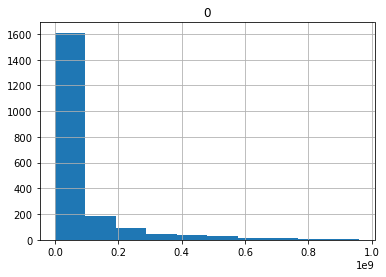

In [570]:
pd.DataFrame(numbs_int).hist();

In [ ]:
# Since data is skewed, replace Na values with median, not the mode

In [575]:
asdf = noNan

In [592]:
noNan["foreign_gross"] = asdf["foreign_gross"].fillna(median_fg)
noNan

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18700000,2018
3383,Edward II (2018 re-release),FM,4800.0,18700000,2018
3384,El Pacto,Sony,2500.0,18700000,2018
3385,The Swan,Synergetic,2400.0,18700000,2018


In [608]:
# change object to int type
noNan["foreign_gross"] = [float(str(i).replace(",", "")) for i in noNan["foreign_gross"]]
noNan["foreign_gross"] = [int(x) for x in noNan["foreign_gross"]]

In [610]:
noNan["foreign_gross"].mean()

52483293.260997936

# rm

In [603]:
rm.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [660]:
rm["runtime"] = rm["runtime"].str.replace(" minutes","")
runtime_noNa = rm["runtime"].dropna()
runtime_noNa = [int(x) for x in runtime_noNa]

In [663]:
runtime_mean = stats.mean(runtime_noNa)
runtime_mean

103.96797385620916

In [664]:
runtime_mode = stats.mode(runtime_noNa)
runtime_mode

90

In [ ]:
# Data is not skewed by much.
# -> Hence, will replace Na "runtime" with the mean

In [671]:
rm["runtime"] = rm["runtime"].fillna(runtime_mean)

In [639]:
rm["runtime"].isna().value_counts()

False    1530
True       30
Name: runtime, dtype: int64

In [641]:
30/1560
# Only 2% of data entries for "runtime" is Na

0.019230769230769232

In [682]:
rm["runtime"] = [int(x) for x in rm["runtime"]]
rm.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200,NaN


In [683]:
# Na's in "box_office"

In [685]:
rm["box_office"].isna().value_counts()

True     1220
False     340
Name: box_office, dtype: int64

In [688]:
1220/1560
# 78% of data entries in "box-office" is Na (22% being no-Na data entries)

0.782051282051282

In [735]:
tempbo = rm["box_office"].dropna()

In [736]:
tempbo = tempbo.str.replace(",","")

In [737]:
tempbo = [int(x) for x in tempbo]

In [741]:
bo_mean = sum(tempbo)/len(tempbo)
bo_mean

37906010.77647059

In [743]:
bo_median = stats.median(tempbo)
bo_median

14141054.5

In [ ]:
# significant difference between "box office" mean and median
# high chance of skewness for "box office"

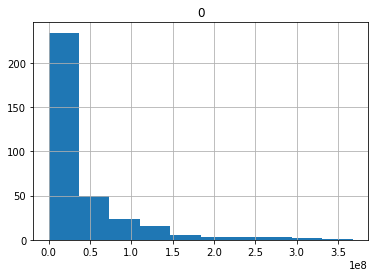

In [745]:
pd.DataFrame(tempbo).hist();

In [ ]:
# replace Na in "box office " with the median

In [756]:
rm["box_office"] = rm["box_office"].fillna(bo_median)
rm

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,1.41411e+07,104,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,1.41411e+07,116,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,1.41411e+07,128,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,1.41411e+07,200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,33886034,106,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,1.41411e+07,88,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,1.41411e+07,111,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,1.41411e+07,101,NaN


In [776]:
rm["currency"].unique()

array([nan, '$'], dtype=object)

In [775]:
rm["currency"].value_counts()

$    340
Name: currency, dtype: int64

In [777]:
rm["currency"]

0       NaN
1         $
2       NaN
3       NaN
4       NaN
       ... 
1555      $
1556    NaN
1557    NaN
1558    NaN
1559    NaN
Name: currency, Length: 1560, dtype: object

In [778]:
340/1560

0.21794871794871795

In [ ]:
# Only 22% of data entries for "currency" is a "$" sign, with the remainder being NaN

In [ ]:
# Replace NaN in "currency" to "$"

In [781]:
rm["currency"] = rm["currency"].fillna("$")
rm.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",$,1.41411e+07,104,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",$,1.41411e+07,116,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",$,1.41411e+07,128,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,$,1.41411e+07,200,NaN


# rr

In [783]:
rr.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [786]:
rating_temp = rr["rating"].dropna()

In [791]:
rating_temp.unique()

array(['3/5', 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4', '6/10',
       '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-', '5/5',
       'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
       

In [ ]:
# -> realise that there are different categories of ratings mixed together under one "rating" column

In [792]:
rr["fresh"].unique()

array(['fresh', 'rotten'], dtype=object)

In [847]:
fresh_rating = rr[["fresh","rating"]]

fresh_fresh = fresh_rating[fresh_rating["fresh"] == "fresh"]
fresh_fresh = fresh_fresh["rating"].dropna()
print(fresh_fresh.unique())
# fresh_rotten 

fresh_rotten = fresh_rating[fresh_rating["fresh"] == "rotten"]
fresh_rotten = fresh_rotten["rating"].dropna()
print(fresh_rotten.unique())

# "rating" criteria appears to be the same/similar for both "fresh" and "rotten"

['3/5' 'B-' 'B' '3/4' '4/5' '4/4' '6/10' '8' '2.5/4' '7/10' 'A-' '5/5'
 '3.5/4' '3.5/5' '8/10' 'B+' '9/10' '7.5/10' 'C-' 'C+' '2.5/5' '2/4'
 '3.1/5' '4.5/5' '7' '3' 'A+' 'A' '4.0/4' '9.5/10' '2.1/2' '6.5/10'
 '3.7/5' '8.4/10' '9' '1' '7.2/10' '5/10' '4.5' '7.7' '5.0/5' '8.5/10'
 '3.0/5' '3.0/4' '4/10' '4/6' '6' '3.5' '8.6/10' '6/8' '2.7' '7.1/10'
 '5/4' '4' 'R' '4.0/5' '7.4/10' '2.3/4' '8.8/10' '5' '6.8/10' '7.3' 'C'
 '7.0/10' '3.2' '4.2' '8.4' '5.5/5' '3/6' '1.5/5' '7.6/10' '0.5/4'
 '8.1/10' '3.6/5' '2/5' '7.7/10' '8.9/10' '8.9' '8.2/10' '2.0/5' '8.3/10'
 '2.6/6' '6.0/10' '5.5/10' '7.9/10' '8.7/10' '3/10' '9.6/10' '9.0/10'
 '4.0' '7.9' '6.7' '1/5' '8.0/10' '9.2/10' '3.7' '4.7' '6.2/10' '8.2'
 '3.4' '9.7' '3.3/5' '3.8/5' '7.4' '4.8' '0/10' '2/2' '4.3/5' '5/6' '9.2'
 '2.7/5' '2.5' '3.0' '3.1' '7.8/10' '7.8' '4.2/5' '9.0' '7.3/10' '4.4/5'
 '6.9/10' '6.2' '5.9/10' '3.3' '9.8' '8.5' '7.1' '3 1/2' '2']
['C' '2/5' '2/4' '1/4' '2.5/4' '4/10' '2.0/5' '3/10' 'F' 'D+' '1.5/4'
 '2.5/5' '5.5/10' '

In [865]:
fresh_fresh

0          3/5
11          B-
13           B
14         3/4
15         3/5
         ...  
54418       C+
54419    2.5/4
54420      3/4
54422    3.5/5
54431      3/5
Name: rating, Length: 24861, dtype: object

In [894]:
alpha = [char for char in fresh_fresh if char[0].isalpha()]
alpha = pd.Series(alpha1).unique()
alpha

array(['B-', 'B', 'A-', 'B+', 'C-', 'C+', 'A+', 'A', 'R', 'C'],
      dtype=object)

In [895]:
beta = [x for x in fresh_fresh if x not in alpha]
beta

['3/5',
 '3/4',
 '3/5',
 '4/5',
 '4/4',
 '6/10',
 '8',
 '2.5/4',
 '7/10',
 '3/5',
 '4/5',
 '5/5',
 '3.5/4',
 '3/5',
 '4/4',
 '4/5',
 '3.5/5',
 '8/10',
 '3/4',
 '3/4',
 '4/4',
 '3.5/4',
 '3/5',
 '6/10',
 '3.5/5',
 '9/10',
 '3.5/5',
 '3/4',
 '7.5/10',
 '5/5',
 '7/10',
 '4/5',
 '3.5/4',
 '4/5',
 '3/5',
 '3.5/5',
 '3.5/5',
 '4/5',
 '4/5',
 '6/10',
 '4/5',
 '4/5',
 '3/5',
 '3/5',
 '3/5',
 '3.5/4',
 '3/5',
 '4/5',
 '3/5',
 '3/5',
 '3.5/5',
 '3/5',
 '3/5',
 '3.5/5',
 '5/5',
 '4/5',
 '3/5',
 '4/5',
 '3.5/4',
 '3/5',
 '3/5',
 '3/5',
 '6/10',
 '3/5',
 '3.5/4',
 '5/5',
 '5/5',
 '3.5/4',
 '3/4',
 '3.5/5',
 '7/10',
 '3/4',
 '3/4',
 '3/4',
 '2.5/4',
 '7/10',
 '3/4',
 '4/5',
 '4/5',
 '7/10',
 '3.5/4',
 '3/5',
 '4/5',
 '3/5',
 '4/5',
 '3/5',
 '3/4',
 '3.5/4',
 '2.5/4',
 '3/4',
 '6/10',
 '3/5',
 '3/5',
 '3/5',
 '4/5',
 '3.5/4',
 '2.5/4',
 '3/4',
 '4/5',
 '8/10',
 '4/4',
 '3/4',
 '3.5/5',
 '2.5/4',
 '3/4',
 '4/5',
 '3/4',
 '2.5/5',
 '9/10',
 '3.5/5',
 '3/4',
 '4/5',
 '8/10',
 '9/10',
 '4/5',
 '3/4',
 '3

In [913]:
beta[0][-2:]

'/5'

In [916]:
split_beta = [x.split("/",1) for x in beta]
split_beta

[['3', '5'],
 ['3', '4'],
 ['3', '5'],
 ['4', '5'],
 ['4', '4'],
 ['6', '10'],
 ['8'],
 ['2.5', '4'],
 ['7', '10'],
 ['3', '5'],
 ['4', '5'],
 ['5', '5'],
 ['3.5', '4'],
 ['3', '5'],
 ['4', '4'],
 ['4', '5'],
 ['3.5', '5'],
 ['8', '10'],
 ['3', '4'],
 ['3', '4'],
 ['4', '4'],
 ['3.5', '4'],
 ['3', '5'],
 ['6', '10'],
 ['3.5', '5'],
 ['9', '10'],
 ['3.5', '5'],
 ['3', '4'],
 ['7.5', '10'],
 ['5', '5'],
 ['7', '10'],
 ['4', '5'],
 ['3.5', '4'],
 ['4', '5'],
 ['3', '5'],
 ['3.5', '5'],
 ['3.5', '5'],
 ['4', '5'],
 ['4', '5'],
 ['6', '10'],
 ['4', '5'],
 ['4', '5'],
 ['3', '5'],
 ['3', '5'],
 ['3', '5'],
 ['3.5', '4'],
 ['3', '5'],
 ['4', '5'],
 ['3', '5'],
 ['3', '5'],
 ['3.5', '5'],
 ['3', '5'],
 ['3', '5'],
 ['3.5', '5'],
 ['5', '5'],
 ['4', '5'],
 ['3', '5'],
 ['4', '5'],
 ['3.5', '4'],
 ['3', '5'],
 ['3', '5'],
 ['3', '5'],
 ['6', '10'],
 ['3', '5'],
 ['3.5', '4'],
 ['5', '5'],
 ['5', '5'],
 ['3.5', '4'],
 ['3', '4'],
 ['3.5', '5'],
 ['7', '10'],
 ['3', '4'],
 ['3', '4'],
 ['3', '4'],

In [979]:
eight = ['8']
x_float_percentage = [float(x)*10 for x in eight]
x_float_percentage

[80.0]

In [993]:
seven_ten = ['7','10']
float_seven_ten = [float(x) for x in seven_ten]
percentage = float_seven_ten[0]/float_seven_ten[1]*100
percentage

70.0

In [998]:
element = split_beta[7]   # e.g. ['2.5','4']

if len(element) < 2:        # e.g. [8]
        percentage = [float(x)*10 for x in element]
else:    # e.g. 10 denominator, e.g. ['7','10']
    float_element = [float(x) for x in element]
    percentage = float_element[0]/float_element[1]*100
    percentage
percentage  

62.5

In [1002]:
appen = []
for element in split_beta:
    if len(element) < 2:
        percentage = [float(x)*10 for x in element]
        appen.append(percentage)
    else:
        float_element = [float(x) for x in element]
        percentage = float_element[0]/float_element[1]*100
        appen.append(percentage)
appen

ValueError: could not convert string to float: '3 1'

In [ ]:
# Group "rating" according to "fresh" to see if there is a relationship between the two

# tm

In [1020]:
tm.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [1021]:
tm.isna().any()
# all columns contain non-Nan values

Unnamed: 0           False
genre_ids            False
id                   False
original_language    False
original_title       False
popularity           False
release_date         False
title                False
vote_average         False
vote_count           False
dtype: bool

## Data Modeling

# bmg 

In [1024]:
noNan

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18700000,2018
3383,Edward II (2018 re-release),FM,4800.0,18700000,2018
3384,El Pacto,Sony,2500.0,18700000,2018
3385,The Swan,Synergetic,2400.0,18700000,2018


In [ ]:
# Here you run your code to model the data

+ column chart: 'studio' vs. 'domestic_gross' (top 5 ~ 25??)

In [1085]:
# top 20 'studio' according to 'domestic_gross' 
top15_dg_stu = store_dg_stu.head(15)
top15_dg_stu.head()

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07


+ column chart: 'studio' vs. 'domestic_gross' (top 15??)

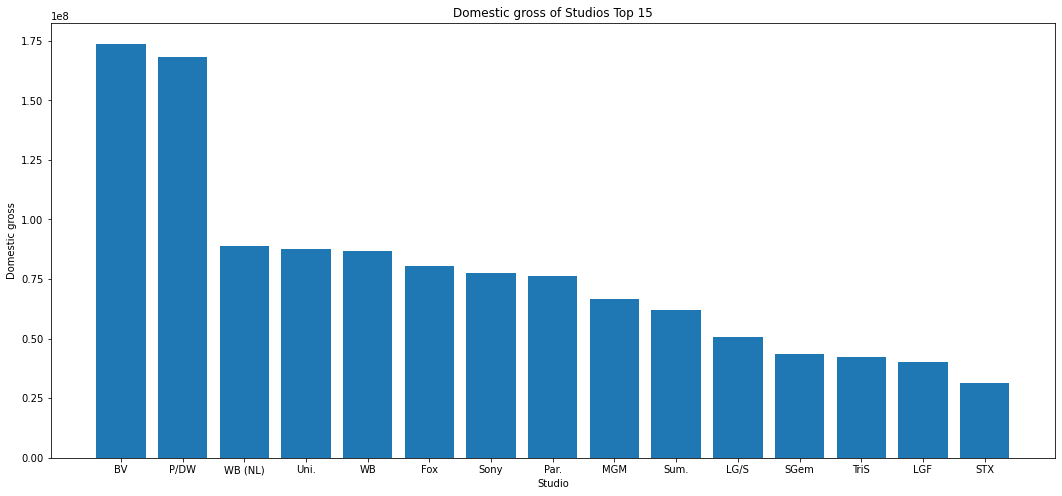

In [1086]:
height = top15_dg_stu["domestic_gross"]
x = range(15)
labels = [x for x in top15_dg_stu.index]

fig, ax = plt.subplots(figsize = (18,8))
ax.bar(x,height,tick_label=labels)
ax.set_xlabel("Studio")
ax.set_ylabel("Domestic gross")
ax.set_title("Domestic gross of Studios Top 15");

+ column chart: 'studio' vs. 'domestic_gross' (bottom 15??)

In [1115]:
bottom15_dg_stu = store_dg_stu.dropna().tail(15)
bottom15_dg_stu

,domestic_gross
studio,
Olive,10900.000000
Indic.,10800.000000
FOR,10200.000000
Grindstone,10000.000000
Crnth,8366.666667
Libre,7200.000000
ParC,5900.000000
KS,5900.000000
BSM,5100.000000


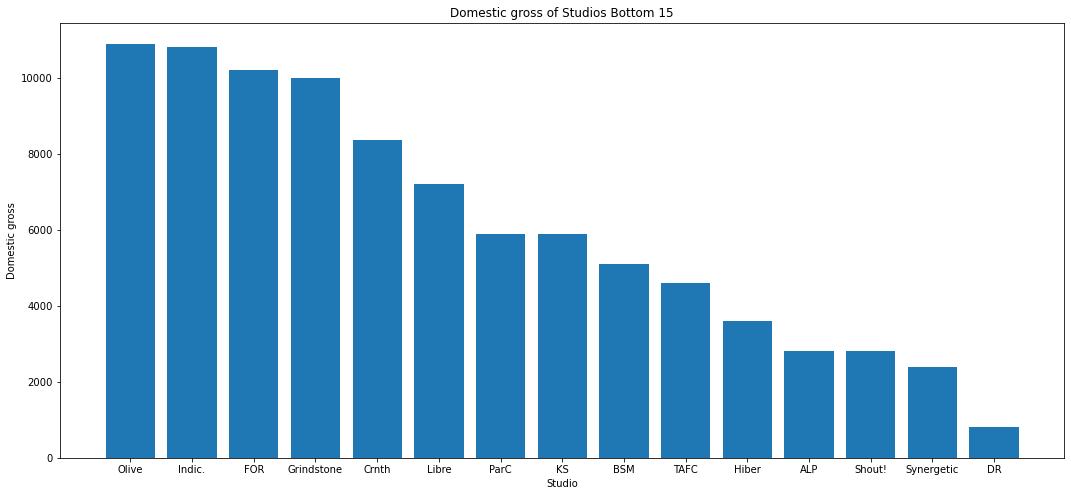

In [1116]:
height = bottom15_dg_stu["domestic_gross"]
x = range(15)
labels = [x for x in bottom15_dg_stu.index]

fig, ax = plt.subplots(figsize = (18,8))
ax.bar(x,height,tick_label=labels)
ax.set_xlabel("Studio")
ax.set_ylabel("Domestic gross")
ax.set_title("Domestic gross of Studios Bottom 15");

+ column chart: 'studio' vs. 'foreign_gross' (top 15)

In [1128]:
top15_stu_fg = store_fg_stu.head(15)

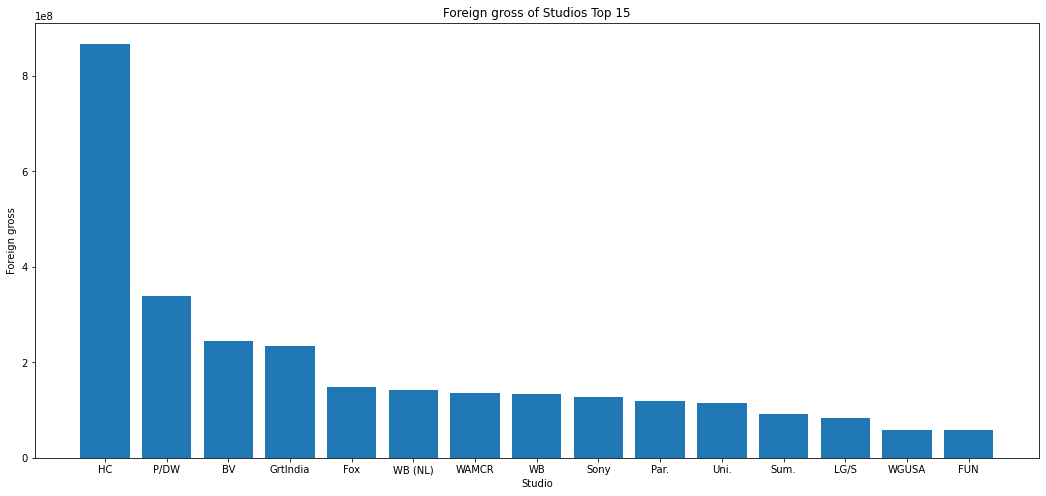

In [1127]:
height = top15_stu_fg["foreign_gross"]
x = range(15)
labels = [x for x in top15_stu_fg.index]

fig, ax = plt.subplots(figsize = (18,8))

ax.bar(x,height,tick_label = labels)
ax.set_xlabel("Studio")
ax.set_ylabel("Foreign gross")
ax.set_title("Foreign gross of Studios Top 15");

In [1401]:
top15_stu_fg.head(15)

,foreign_gross
studio,
HC,8.676000e+08
P/DW,3.393600e+08
BV,2.436911e+08
GrtIndia,2.340000e+08
Fox,1.477446e+08
WB (NL),1.412822e+08
WAMCR,1.349500e+08
WB,1.346779e+08
Sony,1.274560e+08


+ column chart: 'studio' vs. 'foreign_gross' (bottom 15)

In [1129]:
bottom15_stu_fg = store_fg_stu.tail(15)

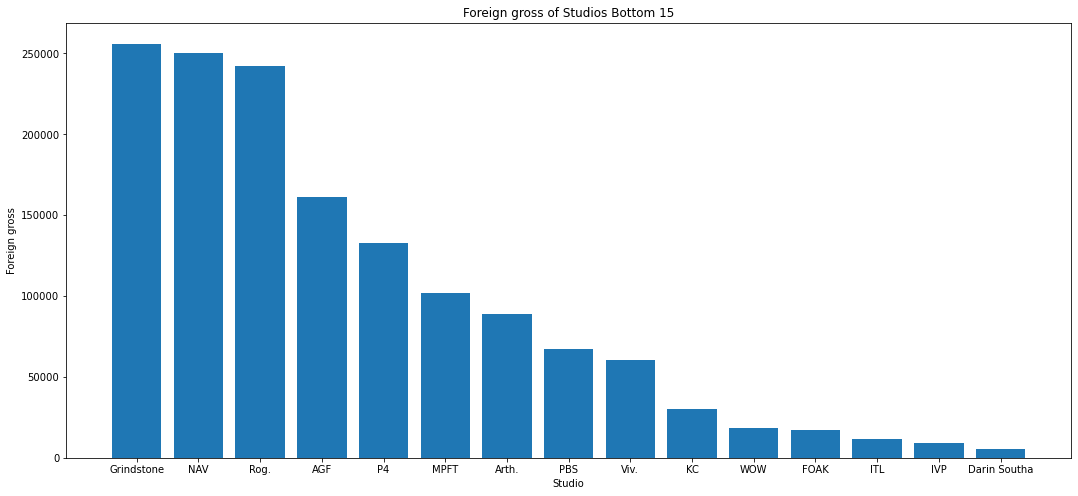

In [1130]:
height = bottom15_stu_fg["foreign_gross"]
x = range(15)
labels = [x for x in bottom15_stu_fg.index]

fig, ax = plt.subplots(figsize = (18,8))

ax.bar(x,height,tick_label = labels)
ax.set_xlabel("Studio")
ax.set_ylabel("Foreign gross")
ax.set_title("Foreign gross of Studios Bottom 15");

# rm

In [1025]:
rm

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",$,1.41411e+07,104,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",$,1.41411e+07,116,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",$,1.41411e+07,128,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,$,1.41411e+07,200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,33886034,106,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",$,1.41411e+07,88,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",$,1.41411e+07,111,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",$,1.41411e+07,101,NaN


+ 'runtime' vs. 'box_office'

In [1151]:
runtime_bo = rm[["runtime","box_office"]]

In [1154]:
order_runtime = runtime_bo.sort_values(by=["runtime"],ascending=True)
order_runtime

,runtime,box_office
1358,5,1.41411e+07
540,6,1.41411e+07
273,7,1.41411e+07
950,10,1.41411e+07
520,11,1.41411e+07
...,...,...
1029,240,1.41411e+07
1490,290,1.41411e+07
1111,294,1.41411e+07
508,313,1.41411e+07


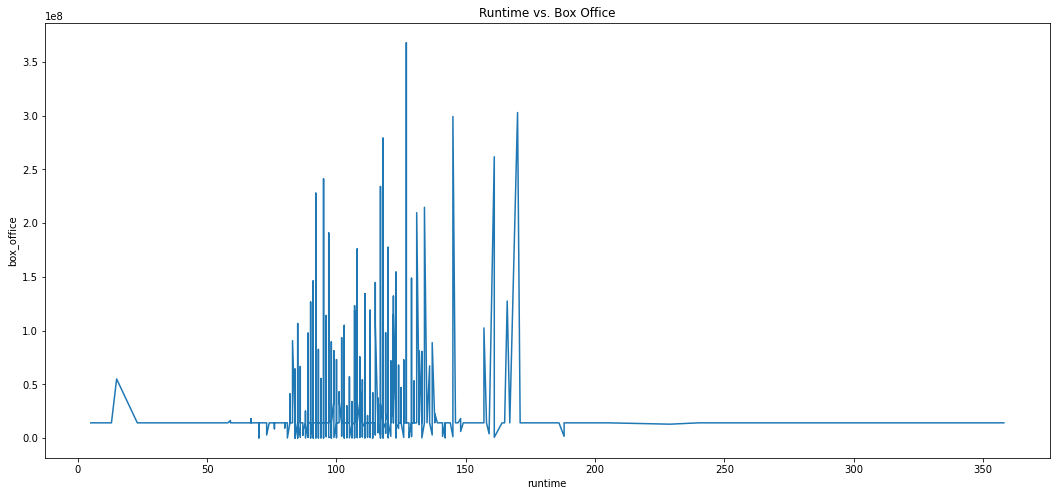

In [1388]:
fig, ax = plt.subplots(figsize = (18,8))

ax.plot(order_runtime["runtime"],order_runtime["box_office"])
ax.set_xlabel("runtime")
ax.set_ylabel("box_office")
ax.set_title("Runtime vs. Box Office");

# box_plot for 'runtime' for top 50 and bottom 50 'box_office'

In [1164]:
runtime_bo["box_office"] = [float(x) for x in rm["box_office"]]
runtime_bo["box_office"]

<ipython-input-1164-b253831536a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtime_bo["box_office"] = [float(x) for x in rm["box_office"]]


0       14141054.5
1         600000.0
2       14141054.5
3       14141054.5
4       14141054.5
           ...    
1555    33886034.0
1556    14141054.5
1557    14141054.5
1558    14141054.5
1559    14141054.5
Name: box_office, Length: 1560, dtype: float64

In [1166]:
order_box_office = runtime_bo.sort_values(by=["box_office"],ascending=False)
order_box_office

,runtime,box_office
827,127,368000000.0
877,170,303001229.0
1188,145,299300000.0
690,118,279167575.0
1117,161,261835892.0
...,...,...
1269,95,8856.0
691,114,8300.0
697,84,3328.0
359,88,2367.0


+ box_plot for 'runtime' for top 50 'box_office' and bottom 50 'box_office'

In [1172]:
top50_bo = order_box_office.head(50)

In [1170]:
bottom50_bo = order_box_office.tail(50)

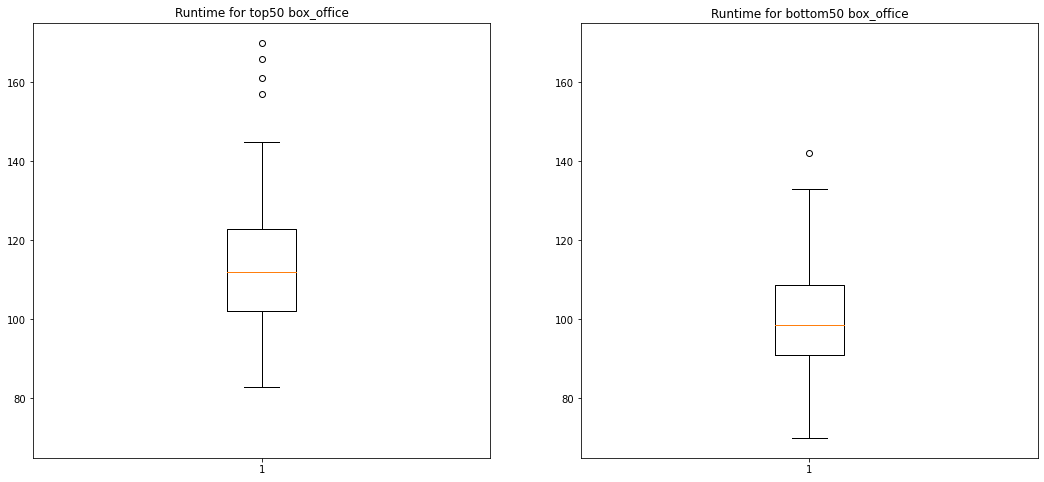

In [1188]:
fig, (ax1,ax2) = plt.subplots(figsize = (18,8), ncols = 2)

ax1.boxplot(top50_bo["runtime"])
ax1.set_ylim(65,175)
ax1.set_title("Runtime for top50 box_office")

ax2.boxplot(bottom50_bo["runtime"])
ax2.set_ylim(65,175)
ax2.set_title("Runtime for bottom50 box_office");

+ box_plot for 'runtime' for top 10 'box_office' and top 50 'box_office'

In [1191]:
top10_bo = order_box_office.head(10)

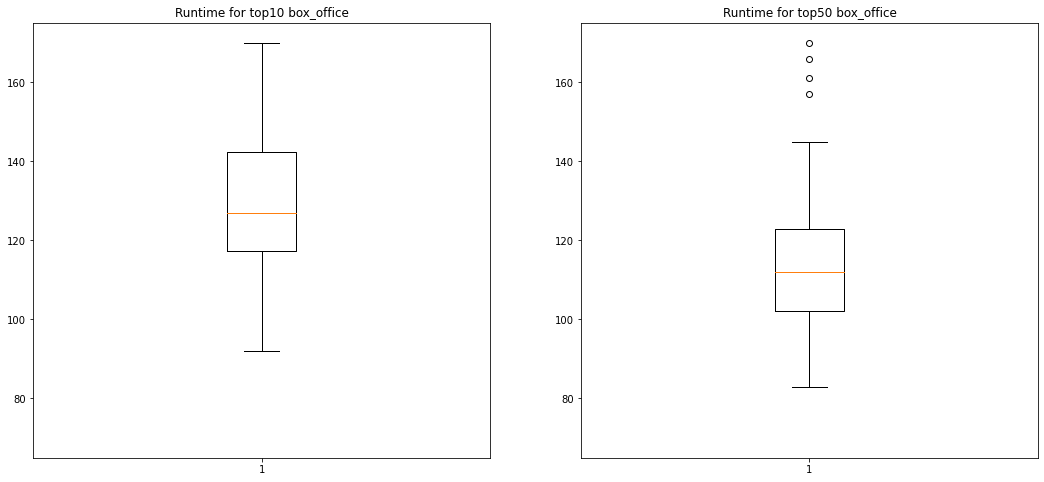

In [1192]:
fig, (ax1,ax2) = plt.subplots(figsize = (18,8), ncols = 2)

ax1.boxplot(top10_bo["runtime"])
ax1.set_ylim(65,175)
ax1.set_title("Runtime for top10 box_office")

ax2.boxplot(top50_bo["runtime"])
ax2.set_ylim(65,175)
ax2.set_title("Runtime for top50 box_office");

+ 'box_office' vs 'studio'

In [ ]:
# Top 15 'studio', according to 'box_office'

In [1207]:
bo_stu = rm[["studio","box_office"]].dropna()

In [1208]:
bo_stu_sorted = bo_stu.sort_values(by=["box_office"],ascending=False)
top15_bo_stu = bo_stu_sorted.head(15)

In [1209]:
top15_bo_stu

,studio,box_office
827,Newmarket Film Group,368000000.0
877,Warner Bros.,303001229.0
1188,MGM,299300000.0
690,Universal Pictures,279167575.0
1117,Warner Bros. Pictures,261835892.0
966,IMAX,257704099.0
504,IFC Films,241250669.0
657,Paramount Pictures,234141872.0
1458,Columbia Pictures,227946274.0
1237,20th Century Fox,214813155.0


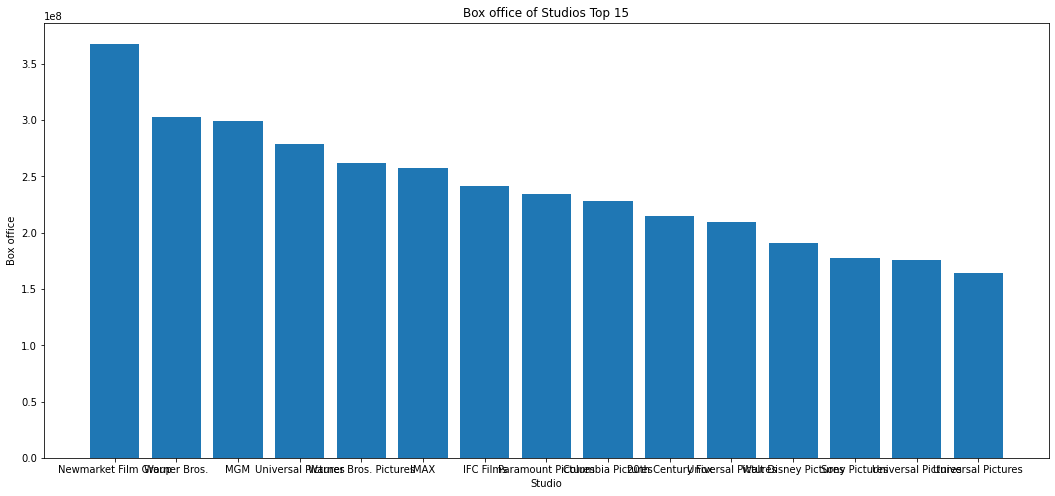

In [1227]:
height = top15_bo_stu["box_office"]
x = range(15)
labels = [top15_bo_stu["studio"][x] for x in top15_bo_stu.index]

fig, ax = plt.subplots(figsize = (18,8))

ax.bar(x,height,tick_label = labels)
ax.set_xlabel("Studio")
ax.set_ylabel("Box office")
ax.set_title("Box office of Studios Top 15");

# rr

In [1026]:
rr

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


# tm

In [1027]:
tm

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


+ average 'popularity' vs 'original_language' (or no average, but instead, clustering)

In [1224]:
lang_pop = tm[["original_language","popularity"]]
group_lang = lang_pop.groupby("original_language")
avg_pop_lang = group_lang.mean()
avg_pop_lang = avg_pop_lang.sort_values(by=["popularity"],ascending=False)
avg_pop_lang

,popularity
original_language,
nb,8.221000
sw,7.440000
ja,5.711072
hz,5.495000
uk,5.331000
...,...
ky,0.600000
cy,0.600000
dz,0.600000


In [1228]:
top20_pop_lang = avg_pop_lang.head(20)

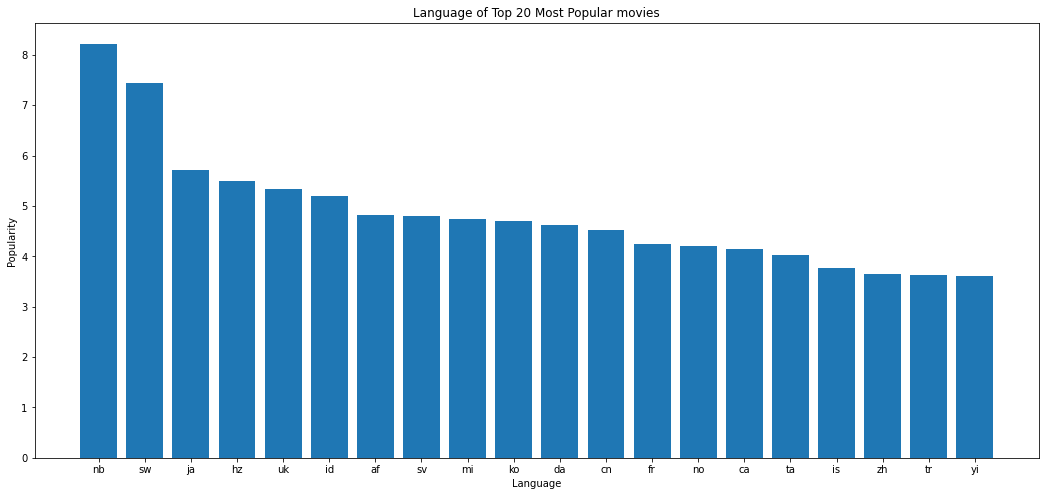

In [1229]:
height = top20_pop_lang["popularity"]
x = range(20)
labels = [x for x in top20_pop_lang.index]

fig, ax = plt.subplots(figsize = (18,8))

ax.bar(x,height,tick_label = labels)
ax.set_xlabel("Language")
ax.set_ylabel("Popularity")
ax.set_title("Language of Top 20 Most Popular movies");

+ 'vote_average' vs. 'original_language'

In [1258]:
va_lang = tm[["original_language","vote_average"]]
va_lang_grouped = va_lang.groupby("original_language")
avg_va_lang = va_lang_grouped.mean()
avg_va_lang = avg_va_lang.sort_values(by=["vote_average"],ascending=False)
avg_va_lang

,vote_average
original_language,
dz,10.000000
ne,8.300000
ur,8.027273
cy,8.000000
gu,7.933333
...,...
bg,4.750000
ku,4.133333
hy,4.100000


In [1259]:
top20_va_lang = avg_va_lang.head(20)

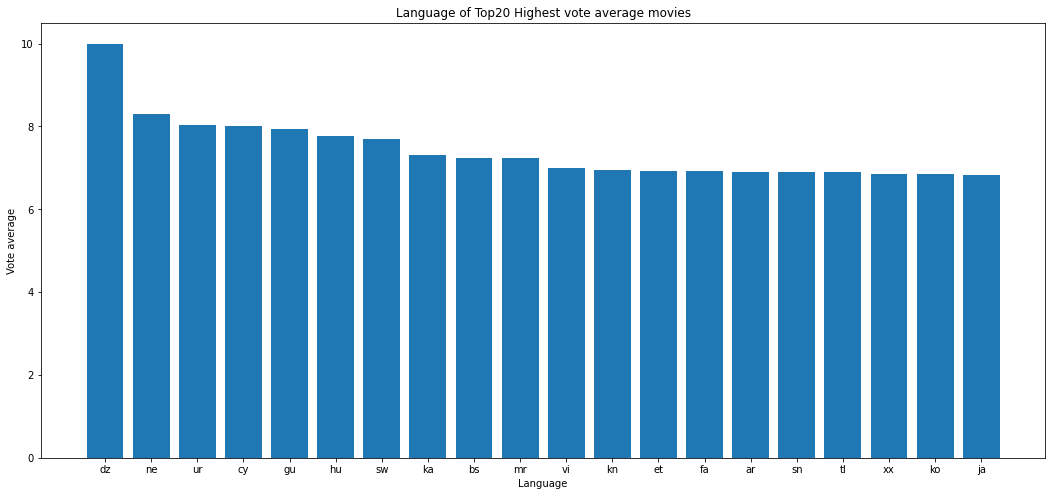

In [1389]:
height = top20_va_lang["vote_average"]
x = range(20)
labels = [x for x in top20_va_lang.index]

fig, ax = plt.subplots(figsize = (18,8))
ax.bar(x,height,tick_label=labels)
ax.set_xlabel("Language")
ax.set_ylabel("Vote average")
ax.set_title("Language of Top20 Highest vote average movies");

+ 'vote_average' vs. 'popularity'

In [1241]:
va_pop = tm[["vote_average","popularity"]]
va_pop = va_pop.sort_values(by=["popularity"],ascending=False)

In [1243]:
va_pop50 = va_pop.head(50)

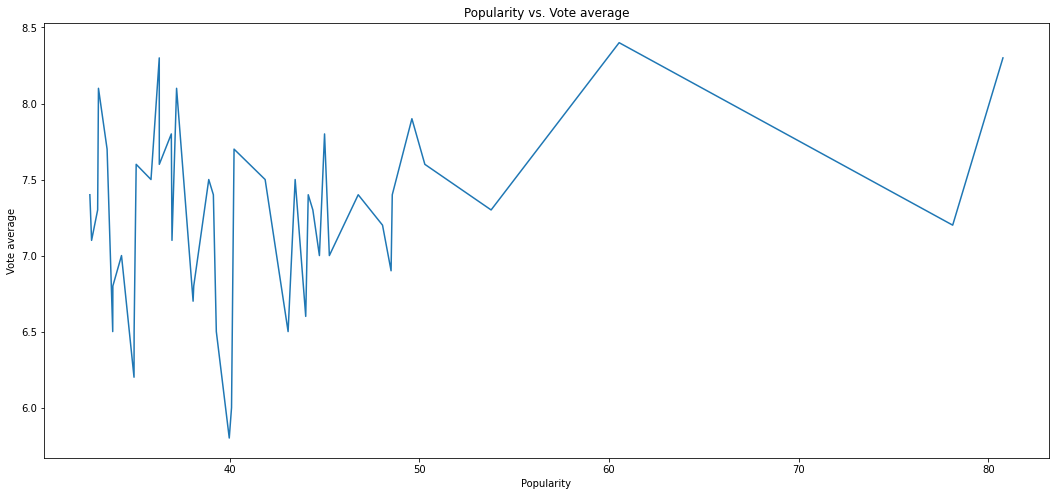

In [1390]:
fig, ax = plt.subplots(figsize = (18,8))

ax.plot(va_pop50["popularity"],va_pop50["vote_average"])
ax.set_xlabel("Popularity")
ax.set_ylabel("Vote average")
ax.set_title("Popularity vs. Vote average");

In [1250]:
va_pop500 = va_pop.head(500)

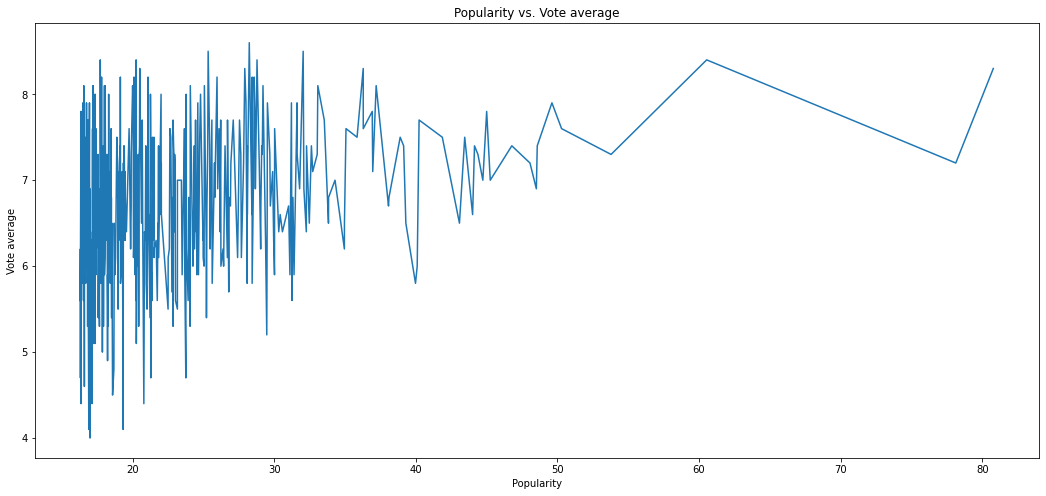

In [1391]:
fig, ax = plt.subplots(figsize = (18,8))

ax.plot(va_pop500["popularity"],va_pop500["vote_average"])
ax.set_xlabel("Popularity")
ax.set_ylabel("Vote average")
ax.set_title("Popularity vs. Vote average");

In [ ]:
# although there is only a slight positive linear trend between 'popularity' and 'vote_average', we can also see 
# that there is clearly less variance in 'vote_average' as 'popularity' increases, implying that a greater
# likelihood of a higher 'vote_average' with an increase in 'popularity'

## Recommendations

1. Recommended ‘publisher’s to review movies released by Microsoft:

In [1402]:
nc.sort_values(by=["review"],ascending=False).head(23)

,review
publisher,
New York Times,580
Washington Post,565
eFilmCritic.com,558
Variety,497
Time Out,478
Ozus' World Movie Reviews,413
Chicago Sun-Times,403
TV Guide,395
Filmcritic.com,381


2. Recommended ‘original_language’ (Top10), according to ’popularity’

In [1403]:
ori_avgpop.sort_values(by=["popularity"],ascending=False).head(10)

,popularity
original_language,
nb,8.221000
sw,7.440000
ja,5.711072
hz,5.495000
uk,5.331000
id,5.187000
af,4.814000
sv,4.799897
mi,4.746000


3. Recommended Top15 ‘studio’ to achieve high ‘foreign_gross’:

In [1404]:
top15_stu_fg.head(15)

,foreign_gross
studio,
HC,8.676000e+08
P/DW,3.393600e+08
BV,2.436911e+08
GrtIndia,2.340000e+08
Fox,1.477446e+08
WB (NL),1.412822e+08
WAMCR,1.349500e+08
WB,1.346779e+08
Sony,1.274560e+08
